In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_trajectories(df, column, discrete=True, cmap='magma', n_actions=5, n_intervals=11, n_epochs_per_interval=100, figsize=10,  max_length=300):
    breaks = [int(x) for x in np.linspace(0, len(df), n_intervals)]
    prev_end = 0
    vmin = np.min(np.min(df[column]))
    vmax = np.max(np.max(df[column]))
    for i, bound in enumerate(breaks[1:]):
        data = df[column][prev_end:prev_end+n_epochs_per_interval]
        padded = []
        for d in data:
            to_append = d + [np.nan] * (max_length - len(d))
            padded.append(d + [np.nan] * (max_length - len(d)))
        if discrete:
            cmap = cmap_discretize(cmap, n_actions)
        fig = plt.figure(figsize=(figsize,figsize/2))
        plot = plt.imshow(padded, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.colorbar()  
        fig.suptitle('epoch {}:{}'.format(prev_end, prev_end+n_epochs_per_interval), fontsize=20)   
        prev_end = bound
        
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    cmap: colormap instance, eg. cm.jet. 
         N: number of colors.     
     Example
     x = resize(arange(100), (5,100))
     djet = cmap_discretize(cm.jet, 5)
     imshow(x, cmap=djet)
     """
    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [(indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in np.arange(N+1)]
        # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

In [3]:
def load_episode_data(directory):
    files = [f for f in os.listdir(directory) if os.path.isfile(directory+f)]
    episode_data = pd.DataFrame()
    for f in files:
        episode_data = episode_data.append(pd.read_pickle(directory+f), ignore_index=True)
    episode_data = episode_data.sort_values('episode')
    episode_data = episode_data.reset_index(drop=True)
    episode_data.episode = [int(x) for x in episode_data.episode]
#     episode_data = episode_data[['episode', 'action', 'reward', 'state', 'logprob', 'mask']]
    return episode_data

In [4]:
ed = load_episode_data('../experiments/ppoc_lightbot_cross_compressed/episodes/')

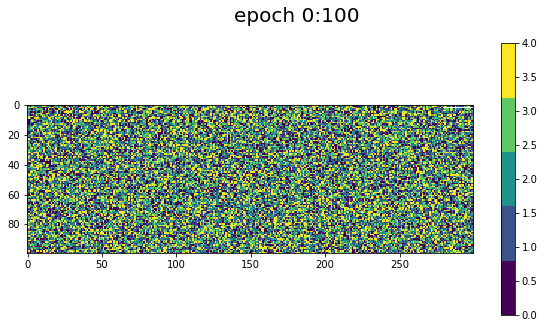

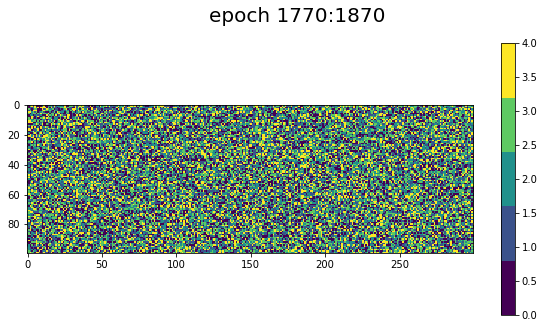

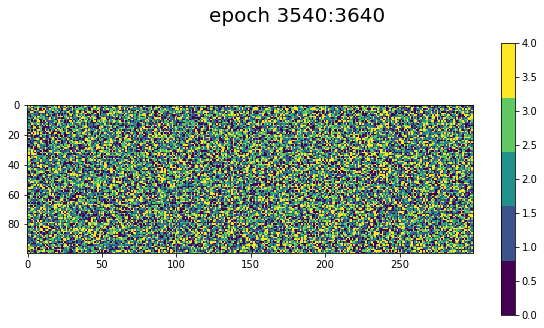

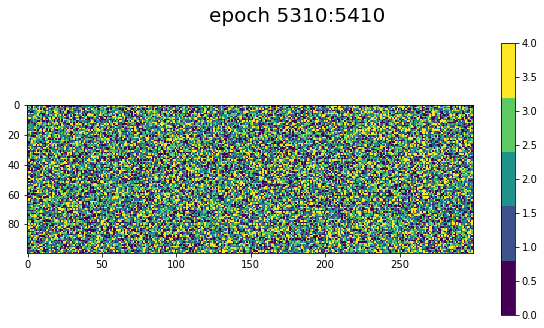

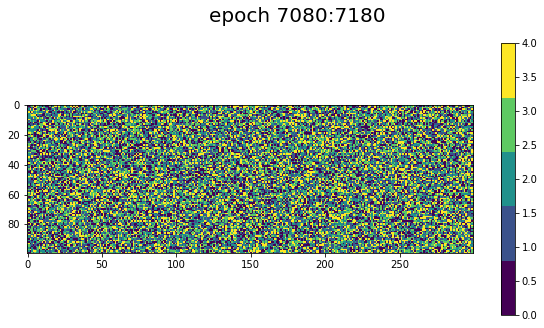

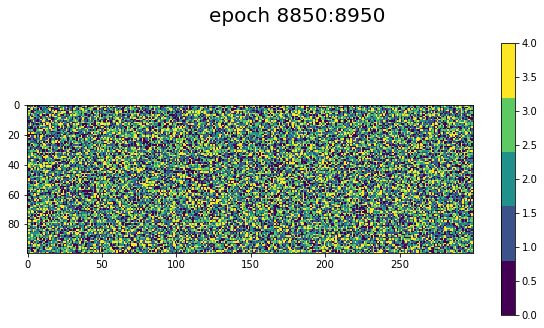

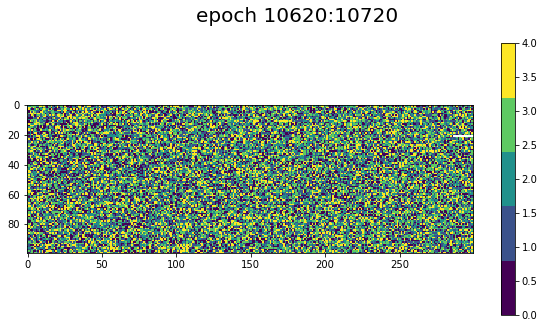

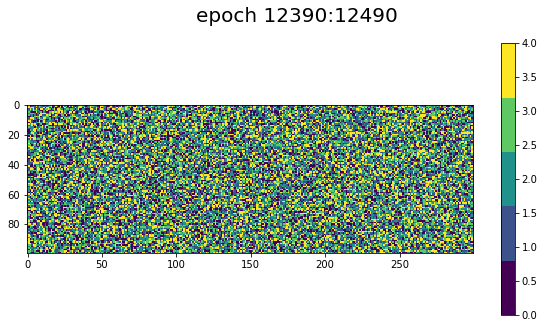

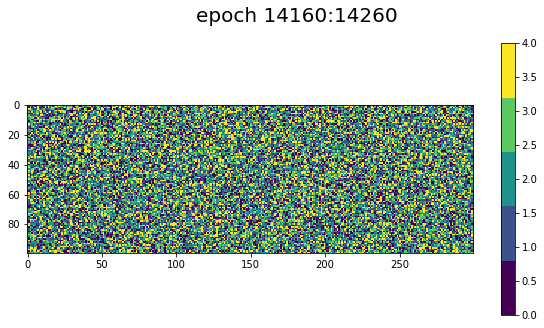

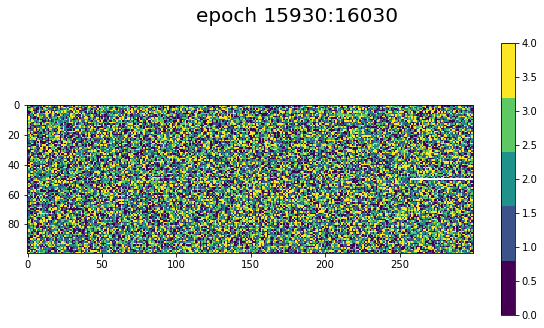

In [5]:
plot_trajectories(ed, 'action', n_actions=5, cmap='viridis', max_length=300)